In [ ]:
import numpy as np
import argparse
import cv2
import signal

from functools import wraps
import errno
import os
import copy

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required = True, help = "Path to the image")
args = vars(ap.parse_args())

# load the image, clone it for output, and then convert it to grayscale
image = cv2.imread(args["image"])
orig_image = np.copy(image)
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow("gray", gray)
cv2.waitKey(0)

circles = None

minimum_circle_size = 100      #this is the range of possible circle in pixels you want to find
maximum_circle_size = 150     #maximum possible circle size you're willing to find in pixels

guess_dp = 1.0

number_of_circles_expected = 1          #we expect to find just one circle
breakout = False

#hand tune this
max_guess_accumulator_array_threshold = 100     #minimum of 1, no maximum, (max 300?) the quantity of votes 
                                                #needed to qualify for a circle to be found.
circleLog = []

guess_accumulator_array_threshold = max_guess_accumulator_array_threshold

while guess_accumulator_array_threshold > 1 and breakout == False:
    #start out with smallest resolution possible, to find the most precise circle, then creep bigger if none found
    guess_dp = 1.0
    print("resetting guess_dp:" + str(guess_dp))
    while guess_dp < 9 and breakout == False:
        guess_radius = maximum_circle_size
        print("setting guess_radius: " + str(guess_radius))
        print(circles is None)
        while True:

            #HoughCircles algorithm isn't strong enough to stand on its own if you don't
            #know EXACTLY what radius the circle in the image is, (accurate to within 3 pixels) 
            #If you don't know radius, you need lots of guess and check and lots of post-processing 
            #verification.  Luckily HoughCircles is pretty quick so we can brute force.

            print("guessing radius: " + str(guess_radius) + 
                    " and dp: " + str(guess_dp) + " vote threshold: " + 
                    str(guess_accumulator_array_threshold))

            circles = cv2.HoughCircles(gray, 
                cv2.HOUGH_GRADIENT, 
                dp=guess_dp,               #resolution of accumulator array.
                minDist=100,                #number of pixels center of circles should be from each other, hardcode
                param1=50,
                param2=guess_accumulator_array_threshold,
                minRadius=(guess_radius-3),    #HoughCircles will look for circles at minimum this size
                maxRadius=(guess_radius+3)     #HoughCircles will look for circles at maximum this size
                )

            if circles is not None:
                if len(circles[0]) == number_of_circles_expected:
                    print("len of circles: " + str(len(circles)))
                    circleLog.append(copy.copy(circles))
                    print("k1")
                break
                circles = None
            guess_radius -= 5 
            if guess_radius < 40:
                break;

        guess_dp += 1.5

    guess_accumulator_array_threshold -= 2

#Return the circleLog with the highest accumulator threshold

# ensure at least some circles were found
for cir in circleLog:
    # convert the (x, y) coordinates and radius of the circles to integers
    output = np.copy(orig_image)

    if (len(cir) > 1):
        print("FAIL before")
        exit()

    print(cir[0, :])

    cir = np.round(cir[0, :]).astype("int")

    # loop over the (x, y) coordinates and radius of the circles
    if (len(cir) > 1):
        print("FAIL after")
        exit()

    for (x, y, r) in cir:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 0, 255), 2)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    # show the output image
    cv2.imshow("output", np.hstack([orig_image, output]))
    cv2.waitKey(0)


## Alternative but worse method: import video with OpenCV 

### Import video

In [42]:
video_cv = cv.VideoCapture('/home/fvega/Datos/brownian_blades/180322/blanca_265.cine')

In [29]:
video_cv.get(cv.CAP_PROP_MONOCHROME)

0.0

## Alternate (not working on notebook) display image method with OpenCV

In [24]:
# NO FUNCIONA EN JUPYTER, solo terminal
def cv_imshow(img):
    while True: 
        cv.imshow('ImageDisplay',img)
        if cv.waitKey(20) & 0xFF == ord('d'):
            cv.destroyAllWindows()
            break

### OpenCV-Read first image, after import

frame has 3  8-bit chanels (RGB), and a resolution of  800 x 832  pixels 



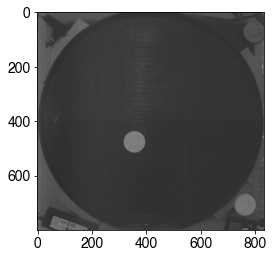

In [49]:
ret, frame = video_cv.read()
print('frame has', np.shape(frame)[2], ' 8-bit chanels (RGB),\
 and a resolution of ', np.shape(frame)[0], 'x', np.shape(frame)[1], ' pixels \n')

image = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap=cm.binary_r)



## OpenCV: import complete video (very slow, not recommended)

In [23]:
def read_cine_cv(file):
    video = pims.Cine(file)
    video_cv = cv.VideoCapture(file)
    frames = [[] for i in range(video.image_count)]
    for i in range(video.image_count):
        ret, frames[i] = video_cv.read()
    return video, frames

In [ ]:
read_cine_cv('/home/fvega/Datos/brownian_blades/180322/blanca_245.cine')